In [1]:
import re
import os
import copy
from math import log, pow
import subprocess
import matplotlib.pyplot as plt

#### Fault Classes

| Fault | Binary | Decimal |
| --- | --- | --- |
| A | 00 | 0 |
| B | 01 | 1 |
| C | 10 | 2 |

#### Fault Code = (variable << 2) + fault_class

| Fault | Binary | Decimal |
| --- | --- | --- |
| A1 | 100 | 4 |
| B1 | 101 | 5 |
| C1 | 110 | 6 |

### Sample (C1)

In [2]:
fault = 2
variable = 1
code = (variable << 2) + fault
code

6

#### Reverse

In [3]:
fault = code & 3
fault

2

In [4]:
variable = code >> 2
variable

1

#### Current Fault Codes

| Fault | Decimal |
| --- | --- |
| A1 | 4 |
| B1 | 5 |
| C1 | 6 |
| A1B1 | 4-5 |
| A1C1 | 4-6 |
| B1C1 | 5-6 |

#### Flow Chart

### Run

In [6]:
command = "D:/code/C++/RT-Cadmium-FDD-New-Code/top_model/mainwd.exe"
completed_process = subprocess.run(command, shell=False, capture_output=True, text=True)
#print(completed_process.stdout)


### Read from file

In [57]:
fileName = "SensorFusion.txt"
    
fault_codes = {}
    
with open(fileName, "r") as f:
    lines = f.readlines()
    
with open(fileName, "r") as f:
    output = f.read()
    
for line in lines:
    if (re.search("supervisor", line) != None):
        res = re.findall("\{\d+[, ]*\d*[, ]*\d*\}", line)

        if len(res) > 0:
            str_interest = res[0].replace('}', '').replace('{', '')
            faults = str_interest.split(', ')
            key = '-' + '-'.join(faults) + '-'
            fault_codes[key] = fault_codes.get(key, 0) + 1

generators = {'A': 0, 'B': 0, 'C': 0}

for key in generators.keys():
    generators[key] = len(re.findall("faultGen" + key, output))

In [58]:
fault_codes

{'-5-': 43, '-6-': 11, '-4-': 9, '-4-5-': 5, '-5-6-': 7, '-4-6-': 2}

In [9]:
def sumFromSupervisor(code):
    '''
    Returns the number of times faults associated with a particular pure fault (the parameter) were output by the supervisor

    @param code: int
    @return int
    '''
    sum = 0
    
    for key, value in fault_codes.items():
        if '-' + str(code) + '-' in key:
            sum += value;
            
    return sum;

In [10]:
a_discarded = generators['A'] - sumFromSupervisor(4)
a_discarded

0

In [11]:
b_discarded = generators['B'] - sumFromSupervisor(5)
b_discarded

0

In [12]:
c_discarded = generators['C'] - sumFromSupervisor(6)
c_discarded

0

In [14]:
total_discarded = a_discarded + b_discarded + c_discarded + d_discarded
total_discarded

0

In [34]:
total_generated = generators['A'] + generators['B'] + generators['C'] + generators['D']
total_generated

91

In [35]:
discarded = {'A': a_discarded, 'B': b_discarded, 'C': c_discarded}
discarded_percentage = {'A': a_discarded * 100 / total_generated, 'B': b_discarded * 100 / total_generated, 'C': c_discarded * 100 / total_generated}

In [36]:
discarded

{'A': 0, 'B': 0, 'C': 0}

In [37]:
fault_codes

{'-5-': 43, '-6-': 11, '-4-': 9, '-4-5-': 5, '-5-6-': 7, '-4-6-': 2}

In [39]:
a_increment = generators['A'] - fault_codes['-4-5-'] - fault_codes['-4-6-'] - a_discarded
a_increment

9

In [40]:
b_increment = generators['B'] - fault_codes['-4-5-'] - fault_codes['-5-6-'] - b_discarded
b_increment

43

In [42]:
c_increment = generators['C'] - fault_codes['-4-6-'] - fault_codes['-5-6-'] - c_discarded
c_increment

11

### Discard Charts

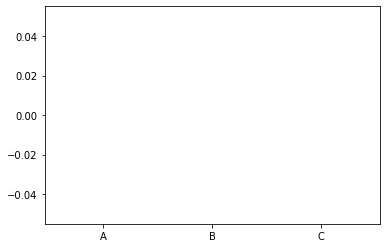

In [59]:
#plt.title('Discarded Bar')
plt.bar(discarded.keys(), discarded.values())
plt.show()
#plt.savefig('discarded bar.png', format='png')

<ipython-input-44-a55430dbb174>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))


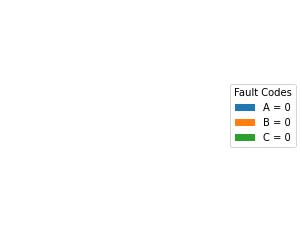

In [44]:
keys, values = list(discarded.keys()), list(discarded.values())
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = str(legend_keys[i]) + " = " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.title("Discarded Pie")
plt.show()
#plt.savefig('discard pie.png', format='png')

### Discard Percentage Charts

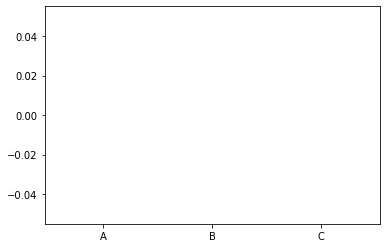

In [45]:
#plt.title('Discard Percentage')
plt.bar(discarded_percentage.keys(), discarded_percentage.values())
plt.show()
#plt.savefig('sensorfusion.png', format='png')

<ipython-input-46-0f993063da11>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))


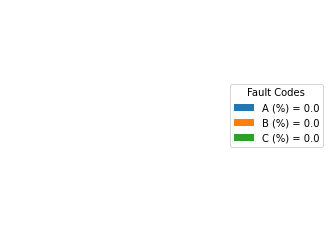

In [46]:
keys, values = list(discarded_percentage.keys()), list(discarded_percentage.values())
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = str(legend_keys[i]) + " (%) = " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.title("Discard Percentage")
plt.show()
#plt.savefig('discard percntage pie.png')

### Toggle Time vs Frequency of Generators

In [56]:
toggle_times = {'A': 620, 'B': 180, 'C': 490}

#### Premise

$faults\,generated \propto \frac{1}{toggle\,time}$

$\therefore B > D > C > A$

### Generator Output Charts (Possibilities of Faults)

In [48]:
generators['A']

16

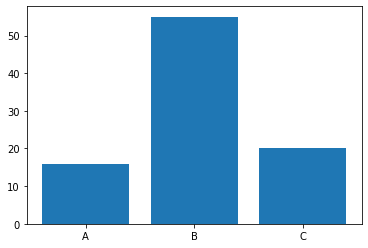

In [60]:
#plt.title('Generator Output (Possibilities of Faults)')
plt.bar(generators.keys(), generators.values())
plt.show()
#plt.savefig('generator output bar.png')

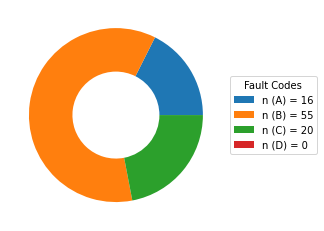

In [50]:
keys, values = list(generators.keys()), list(generators.values())
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = "n (" + str(legend_keys[i]) + ") = " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.title("Generator Output Charts (Possibilities of Fault)")
#plt.show()
plt.savefig('generator output pie.png')

### Single-Run Fault Charts

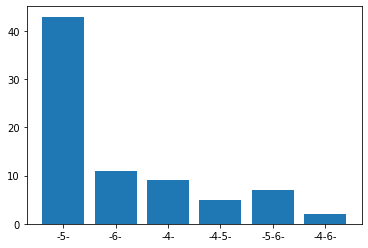

In [51]:
chart_data = copy.copy(fault_codes)
values = list(chart_data.values())
keys = list(chart_data.keys())

plt.bar(keys, values)
#plt.title('Single-Run')
plt.show()
#plt.savefig('single-run bar.png')

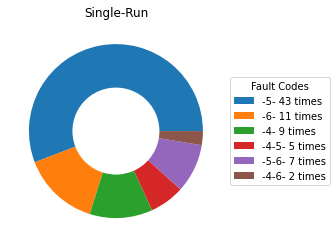

<Figure size 432x288 with 0 Axes>

In [52]:
# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, 
                        textprops=dict(color="w"), 
                        wedgeprops=dict(width=0.5))

legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = str(legend_keys[i]) + " " + str(values[i]) + " " + "times"
        
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Single-Run")
plt.show()
plt.savefig('single-run pie.png')